In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import acquire
import prepare

# Using your store items data:

In [2]:
items = acquire.items_data()


Reading from local CSV...


In [3]:
stores = acquire.stores_data()


Reading from local CSV...


In [4]:
sales = acquire.sales_data()


Reading from local CSV...


In [6]:
df = acquire.combine_store_data(sales, items, stores)


In [7]:
df.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode
0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


### 1).Convert date column to datetime format.


In [8]:
df.sale_date.dtype


dtype('O')

In [9]:
type(df.sale_date[0])


str

In [10]:
df.sale_date.str.endswith(' 00:00:00 GMT').mean()


1.0

In [11]:
df.sale_date

0         Tue, 01 Jan 2013 00:00:00 GMT
1         Wed, 02 Jan 2013 00:00:00 GMT
2         Thu, 03 Jan 2013 00:00:00 GMT
3         Fri, 04 Jan 2013 00:00:00 GMT
4         Sat, 05 Jan 2013 00:00:00 GMT
                      ...              
912995    Wed, 27 Dec 2017 00:00:00 GMT
912996    Thu, 28 Dec 2017 00:00:00 GMT
912997    Fri, 29 Dec 2017 00:00:00 GMT
912998    Sat, 30 Dec 2017 00:00:00 GMT
912999    Sun, 31 Dec 2017 00:00:00 GMT
Name: sale_date, Length: 913000, dtype: object

In [12]:
df['sale_date'] = df.sale_date.str[:-13]


In [13]:
df['sale_date'] = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')


### 2). Plot the distribution of sale_amount and item_price


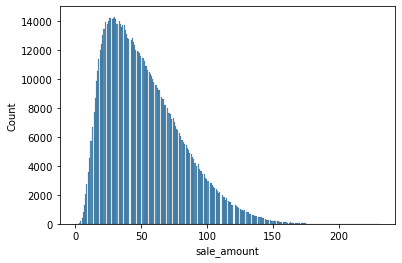

In [14]:
sns.histplot(df.sale_amount)
plt.show()

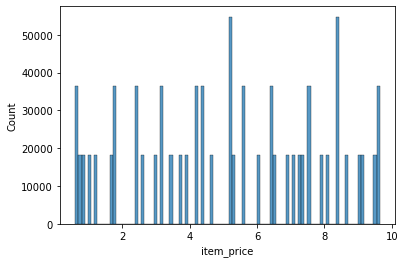

In [15]:
sns.histplot(df.item_price)
plt.show()

### 3).Set the index to be the datetime variable.


In [16]:
df = df.set_index('sale_date').sort_index()


In [17]:
df.head(2)

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217


### 4). Add a 'month' and 'day of week' column to your dataframe.


In [18]:
df['month'] = df.index.strftime('%m-%b')
df['weekday'] = df.index.strftime('%w-%a')

### 5). Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [19]:
 df['sales_total'] = df.sale_amount * df.item_price


In [20]:
df.head(2)

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,01-Jan,2-Tue,10.92
2013-01-01,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,01-Jan,2-Tue,218.40


### 6). Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [21]:
def prep_store_data(df):
    '''
    Takes in the df of combined items, sales, and stores info.
    - Converts index to datetime formatted sale date
    - adds columns for month and day of the week
    - adds a sales total column (sale_amount * item_price)
    '''
    # if no time of day information is stored (i.e. all times == 00:00:00)
    if df.sale_date.str.endswith(' 00:00:00 GMT').mean() == 1:
        # then we will truncate the sale_date string for faster processing to_datetime
        df['sale_date'] = df.sale_date.str[:-13]
        # convert the sale_date to a pandas datetime with format specifier
        df['sale_date'] = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')
    else:
        # convert the sale_date to pandas datetime
        df['sale_date'] = pd.to_datetime(df.sale_date) 
    # set sale_date as the index
    df = df.set_index('sale_date').sort_index()
    # add month column
    df['month'] = df.index.strftime('%m-%b')
    # add weekday column
    df['weekday'] = df.index.strftime('%w-%a')
    # add sales_total column
    df['sales_total'] = df.sale_amount * df.item_price
    
    return df

In [22]:
df = acquire.combine_store_data(sales, items, stores)


In [23]:
df = prepare.prep_store_data(df)


In [24]:
df.head(3)


,item_id,item_price,item_upc12,item_upc14,items_sold,sale_id,store_id,store_zipcode,dollars_sold
sale_date,,,,,,,,,
2013-01-01,12750,2580.2,119234392245520,119234392245520,13696.0,227794000,2750,39112400,73844.01
2013-01-02,12750,2580.2,119234392245520,119234392245520,13678.0,227794500,2750,39112400,73570.58
2013-01-03,12750,2580.2,119234392245520,119234392245520,14488.0,227795000,2750,39112400,78169.48


# Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [25]:
df = acquire.opsd_germany_data()


No local copy exists. Reading data from:  https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv ...
Writing to local csv...


In [26]:
for col in df.columns:
    df = df.rename(columns={col: col.lower().replace('+', '_')})

### 1). Convert the date column to datetime format


In [27]:
df['date'] = pd.to_datetime(df.date)


### 2). Plot the distribution of each of your variables


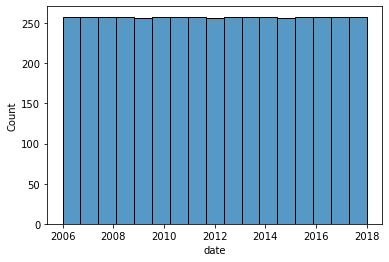

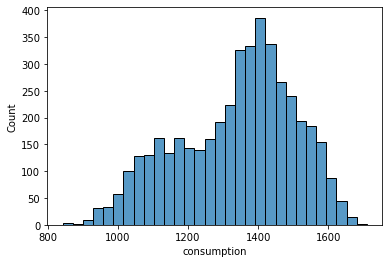

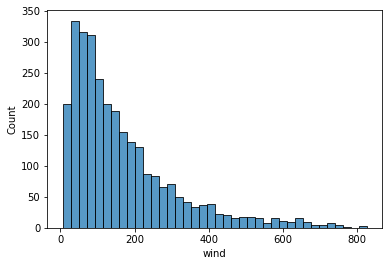

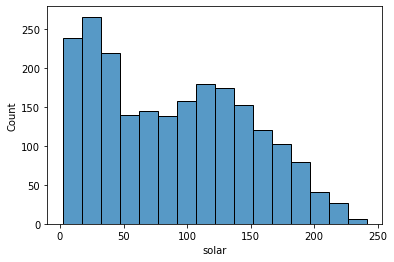

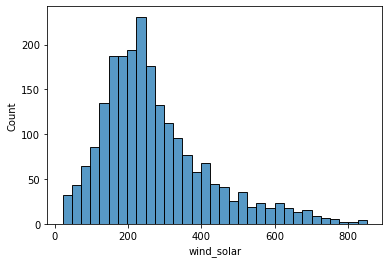

In [28]:
for col in df.columns:
    sns.histplot(df[col])
    plt.show()

### 3). Set the index to be the datetime variable


In [30]:
df = df.set_index('date').sort_index()


### 4). Add a month and a year column to your dataframe


In [31]:
df['month'] = df.index.strftime('%m-%b')
df['year'] = df.index.year

### 5). fill any missing values


In [32]:
df['wind'] = df.wind.fillna(0)
df['solar'] = df.solar.fillna(0)
df['wind_solar'] = df.wind + df.solar

### 6). Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [33]:
def prep_opsd_germany_data(df):
    # rename columns for convenience
    for col in df.columns:
        df = df.rename(columns={col: col.lower().replace('+', '_')})
    # convert the date column to a datetime type
    df['date'] = pd.to_datetime(df.date)
    # set the index to the date column and sort
    df = df.set_index('date').sort_index()
    # add month and year columns
    df['month'] = df.index.strftime('%m-%b')
    df['year'] = df.index.year
    # fill missing values
    df['wind'] = df.wind.fillna(0)
    df['solar'] = df.solar.fillna(0)
    df['wind_solar'] = df.wind + df.solar
    return df


In [34]:
df = acquire.opsd_germany_data()


Reading from local CSV...


In [35]:
df = prepare.prep_opsd_germany_data(df)


In [36]:
df.head(3)

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,01-Jan,2006
2006-01-02,1380.521,0.0,0.0,0.0,01-Jan,2006
2006-01-03,1442.533,0.0,0.0,0.0,01-Jan,2006
